# Session 3: Practical programming in Python

* Converting values in a CSV file
* Monte Carlo methods
* Finite difference methods


We want to read the row `temperature` and convert the temperature from Fahrenheit to Celcius.


We can use the following equation to convert the temperature 

$$ T_c = ( T_F - 32 ) \cdot \frac{5}{9}.$$

The file `data.csv` is available [here](https://github.com/diehlpkteaching/MEDP-7098/blob/main/data.csv).

In [1]:
!cat ../data.csv

#step,x,y,z,temperature
1,0,0,0,60
2,0,1,0,80
3,0,0,1,100
4,1,1,0,225


## Reading CSV files

In [2]:
import csv

with open("../data.csv") as csvfile:
    spamreader = csv.reader(csvfile)
    next(spamreader) # Skip the header
    for row in spamreader:
        print(row)

['1', '0', '0', '0', '60']
['2', '0', '1', '0', '80']
['3', '0', '0', '1', '100']
['4', '1', '1', '0', '225']


## Converting the values

In [3]:
with open("../data.csv") as csvfile:
    spamreader = csv.reader(csvfile)
    next(spamreader) # Skip the header
    for row in spamreader:
        temp = float(row[len(row)-1])
        print((temp-32) * 5 / 9)

15.555555555555555
26.666666666666668
37.77777777777778
107.22222222222223


### Writing back to the CSV file

In [4]:
with open('data_celcius.csv', 'w') as csvoutfile:
    spamwriter = csv.writer(csvoutfile)
    with open("../data.csv") as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            if not '#' in row[0]:
                temp = float(row[len(row)-1])
                row[len(row)-1] = (temp-32) * 5 / 9
            spamwriter.writerow(row)
    

In [5]:
%%bash
cat data_celcius.csv

#step,x,y,z,temperature
1,0,0,0,15.555555555555555
2,0,1,0,26.666666666666668
3,0,0,1,37.77777777777778
4,1,1,0,107.22222222222223


## Monte Carlo methods


General pattern:

* Define the input parameters
* Randomly chose input parameters   
* Do deterministic computations on the inputs
* Aggregate the results



Ingredients:


* Unit square $1\times 1$ 
* Circle with the radius of $r=\frac{1}{2}$
* Area of the circle $A_c=\pi r^2 = \frac{\pi}{4} $ 
* Area of the square $A_s = 1 \cdot 1 = 1$
* Recall: $A_c=\frac{\pi}{4}\rightarrow \pi = 4A_c$
* Hint:   $\frac{A_c}{A_s} = A_c$ because $A_s=1$

Now compute PI by using the two areas:

$\pi \approx 4 \frac{A_c}{A_s} $
The areas can be approximated by using $N$ random samples $(x,y)$ and count the points inside the circle $N_c$ 

$\pi \approx 4 \frac{N_c}{N} $


In [6]:
import random
import math

ncount = 0.0

# Ask the user for the nummber of iterations
end = int(input("Please enter the number of iterations:"))

#  Loop over the iterations
for _ in range(end):
    xVar = random.uniform(0,1)
    yVar = random.uniform(0,1)

    if xVar * xVar + yVar * yVar <= 1:
        ncount +=1 

# Compute the final result
pi = 4.0 * ncount / end

# Print the final result
print(" Pi is equal to " + str(pi) + " after " + str(end) + " iterations")
print(" Error:" + str(pi-math.pi))

Please enter the number of iterations:100000
 Pi is equal to 3.14336 after 100000 iterations
 Error:0.001767346410206816


### Finite differences

### Classical linear elasticity model

Let $\Omega = (0,1) \subset \mathbb R$ and $\overline{\Omega}$ be the closure of $\Omega$, i.e.\ $\Omega=[0,1]$. The continuum local problem consists in finding the displacement $(u\in\overline{\Omega})$ such that:

$$
- E u''(x) = f_b(x), \quad \forall x \in \Omega, 
$$

$$
u(x) = 0, \quad \text{at}\ x=0,
$$

$$
Eu'(x) = g, \quad \text{at}\ x=1,
$$

where $E$ is the constant modulus of elasticity of the bar, $f_b=f_b(x)$ is a scalar function describing the external body force density (per unit length), and $g \in \mathbb R$ is the traction force applied at end point $x=1$. 

In [7]:
import numpy as np #Package for matrices and vectors 


# Generates matrix of size N times N and fills the matrix with zeros
def zeroMatrix(N):

    return np.zeros([N, N])

# Generates a Blaze dynamic vector of size N and fills the vector with zeros
def zeroVector(N):

    return np.zeros([N])
 

In [8]:
# Solves the matrix system A \times x = b and returns x
def solve(A,b):

     return np.linalg.solve(A,b)

## Force function

As the external load, a linear $force_b$ function $force : \mathbb{R} \rightarrow \mathbb{R}$

 $$ force_b(x)  = \begin{cases} 1, if x == 1, \\
 0 , else\end{cases}, x = [0,1]$$

In [9]:
def force(x):
    
    if x == 1:
        return 1;
    
    return 0;


## Discretization

As the domain $\overline{\Omega}$ we consider the intervall $[0,1]$ and discretize the interval with $n$ elements and using the spacing $h=\frac{1}{n}$ such that $x={0,1\cdot h,2\cdot h,\ldots,n\cdot h}$.

In [10]:
n = 2**4
h= 1./n;
n += 1;

In [11]:
x = zeroVector(n);
for i in range(0,n):
    x[i] = i * h;

In [12]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Reference configuration')

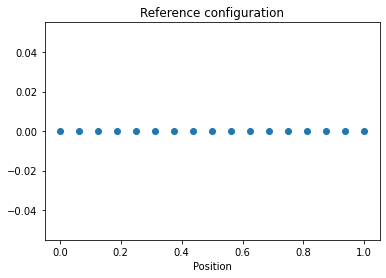

In [13]:
plt.scatter(x,zeroVector(n))
plt.xlabel("Position")
plt.title("Reference configuration")

In [14]:
f = zeroVector(n);
for i in range(0,len(f)):
 f[i] = force(x[i])

Text(0, 0.5, 'Force')

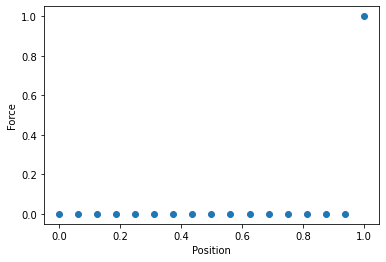

In [15]:
plt.scatter(x,f)
plt.xlabel("Position")
plt.ylabel("Force")

### Assemble the stiffness matrix using finite differences


1. Dirichlet boundary condition at $x=0$:
$$
u_1 = 0.
$$
2. Finite difference schems for 
In $\overline{\Omega}$: 
$\forall i=2,\ldots,n-1$:

$$
- E \frac{u_{i-1}-2u_i+u_{i+1}}{h^2} = f_b(x_k).
$$

3. Neumann boundary condition at $x=1$:

$$
E \frac{u_{n-3}-4u_{n-2}+3u_n-1}{2h} = g.
$$

For simplicity we assume $E=1$.


In [16]:
matrix = zeroMatrix(n)

matrix[0,0] = 1

for i in range(1,n-1):
    matrix[i,i-1] = -2;
    matrix[i,i] = 4;
    matrix[i,i+1] = -2;
    

matrix[n-1,n-1] = 3*h;
matrix[n-1,n-2] = -4*h;    
matrix[n-1,n-3] = h;

matrix *= 1./(2*h*h);

In [17]:
u = solve(matrix,f)

Text(0, 0.5, 'Displacement')

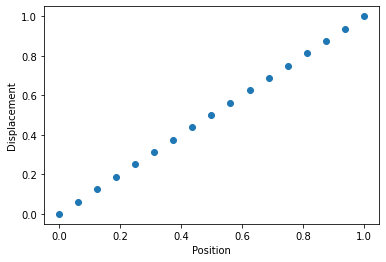

In [18]:
plt.scatter(x,u)
plt.xlabel("Position")
plt.ylabel("Displacement")